#### Imports

In [1]:
from Neuron import *
from NeuronLayer import *
from NeuronNetwork import *
import random
import pandas as pd

#### Maken van een waarheidstabel

In [2]:
"""Deze functie is ervoor bedoelt om makkelijker weer te kunnen geven of een output True or False 
representeert. Om dingen te clasifiseren is dit ook nodig."""

def trueORfalse(output):
    result = []
    for number in output:
        if number < 0.1:
            result.append(False)
        elif number > 0.99:
            result.append(True)
        else:
            result.append(number)
    return result

In [3]:
def create_table_data(function, expectations):
    """Deze functie berekent de uitkomst van een perceptron/netwerk en geeft dit terug in een goed format"""
    data = []

    for item in expectations:
        output = function(item[0])
        if type(output) != list:
            output = [output]
        data.append([item[0], trueORfalse(output)])
    return data


In [26]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""
    for row in data:
        print(row)
    columns = ['Input', 'Output']
    
    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')
    

#### Random startwaarden

In [5]:
def generate_random_float():
    return round(random.uniform(-10, 10),1)

def generate_random_list(numbers):
    lst = []
    for item in range(numbers):
        lst.append(generate_random_float())
    return lst

## Perceptron unit


#### AND
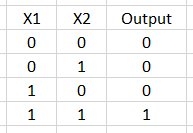


In [6]:
"""AND Test"""

# n_and = Neuron('AND', generate_random_float(), generate_random_list(2))
n_and = Neuron('AND', -1.2, [0.5, 0.1])
print(n_and)

and_expectation = [[[False, False], False],  
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]
print_table(and_expectation, 'Verwachting')

old_output = create_table_data(n_and.activation, and_expectation)
print_table(old_output, 'Uitkomst VOOR training')

for i in range(25000):
    random.shuffle(and_expectation)
    for input_list, expectation in and_expectation:

        output = n_and.activation(input_list)
        n_and.calculate_error_output(n_and.output, expectation)
        n_and.update(input_list, 10)

and_expectation = [[[False, False], False],  # Omdat de eerste dataset is geshuffled
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]

updated_output = create_table_data(n_and.activation, and_expectation)
print_table(updated_output, 'Uitkomst Na Training')

print(n_and)

<AND port>
- Bias = -1.2
- Weights = [0.5, 0.1]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst VOOR training>
             Input                 Output
0  [False, False]  [0.23147521650098238]
1   [False, True]  [0.24973989440488245]
2   [True, False]  [0.33181222783183395]
3    [True, True]  [0.35434369377420455]

<Uitkomst Na Training>
             Input   Output
0  [False, False]  [False]
1   [False, True]  [False]
2   [True, False]  [False]
3    [True, True]   [True]

<AND port>
- Bias = -17.07432986569509
- Weights = [11.326548070543502, 11.326549550302941]



In [7]:
"""XOR Test"""

N1 = Neuron('Neuron 1', -1, [1, 1])
N2 = Neuron('Neuron 2', -1, [0.5, 0.5])
outputNeuron = Neuron('Output Neuron', 0, [0.6, 1])

hiddenLayer = NeuronLayer('Hidden Layer', [N1, N2])
outputLayer = NeuronLayer('Output Layer', [outputNeuron])

network_xor = NeuronNetwork([hiddenLayer, outputLayer])

xor_expectation = [[[False, False], [False]],
                   [[False, True], [True]],
                   [[True, False], [True]],
                   [[True, True], [False]]]

print_table(xor_expectation, "Verwachting")

old_output = create_table_data(network_xor.feed_forward, xor_expectation)
print_table(old_output, 'Uitkomst VOOR training')

network_xor.train(xor_expectation, 10000, 10)

xor_expectation = [[[False, False], [False]],
                   [[False, True], [True]],
                   [[True, False], [True]],
                   [[True, True], [False]]]

new_output = create_table_data(network_xor.feed_forward, xor_expectation)
print_table(new_output, 'Uitkomst NA training')


<Verwachting>
             Input   Output
0  [False, False]  [False]
1   [False, True]   [True]
2   [True, False]   [True]
3    [True, True]  [False]

<Uitkomst VOOR training>
             Input                Output
0  [False, False]  [0.6059468015087622]
1   [False, True]  [0.6631895793149735]
2   [True, False]  [0.6631895793149735]
3    [True, True]  [0.7188238810813806]

<Uitkomst NA training>
             Input   Output
0  [False, False]  [False]
1   [False, True]   [True]
2   [True, False]   [True]
3    [True, True]  [False]



In [8]:
"""ADDER Test"""

N1 = Neuron('Neuron 1', 0, [1, 1])
N2 = Neuron('Neuron 2', 0, [1, 1])
N3 = Neuron('Neuron 3', 0, [1, 1])

outputNeuron1 = Neuron('Output Neuron', -1.2, [0.5, 0.1, 1])
outputNeuron2 = Neuron('Output Neuron', -1.2, [0.5, 0.15, 0.8])

hiddenLayer = NeuronLayer('Hidden Layer', [N1, N2, N3])
outputLayer = NeuronLayer('Output Layer', [outputNeuron1, outputNeuron2])

network_adder = NeuronNetwork([hiddenLayer, outputLayer])
print(network_adder)

adder_expectation = [[[False, False], [False, False]],
                   [[False, True], [True, False]],
                   [[True, False], [True, False]],
                   [[True, True], [False, True]]]

print_table(adder_expectation, "Verwachting")

old_output = create_table_data(network_adder.feed_forward, adder_expectation)
print_table(old_output, 'Uitkomst VOOR training')

network_adder.train(adder_expectation, 25000, 10)
adder_expectation = [[[False, False], [False, False]],
                   [[False, True], [True, False]],
                   [[True, False], [True, False]],
                   [[True, True], [False, True]]]



new_output = create_table_data(network_adder.feed_forward, adder_expectation)
print_table(new_output, 'Uitkomst NA training')




----------------------------------------
Dit netwerk bestaat uit 2 layers

<Verwachting>
             Input          Output
0  [False, False]  [False, False]
1   [False, True]   [True, False]
2   [True, False]   [True, False]
3    [True, True]   [False, True]

<Uitkomst VOOR training>
             Input                                     Output
0  [False, False]    [0.401312339887548, 0.3834334954786807]
1   [False, True]  [0.49242401130314856, 0.4650657469449089]
2   [True, False]  [0.49242401130314856, 0.4650657469449089]
3    [True, True]    [0.5521287167773176, 0.519279377518996]

<Uitkomst NA training>
             Input          Output
0  [False, False]  [False, False]
1   [False, True]   [True, False]
2   [True, False]   [True, False]
3    [True, True]   [False, True]



## IRIS dataset


In [9]:
from sklearn.datasets import load_iris

data = load_iris()

In [10]:
set_ver_ver_features = data['data']
set_ver_ver_targets = data['target']

# Dataset
iris_data_3 = []
for index in range(len(set_ver_ver_features)):
    iris_data_3.append([list(set_ver_ver_features[index]), set_ver_ver_targets[index]])
iris_data_3

[[[5.1, 3.5, 1.4, 0.2], 0],
 [[4.9, 3.0, 1.4, 0.2], 0],
 [[4.7, 3.2, 1.3, 0.2], 0],
 [[4.6, 3.1, 1.5, 0.2], 0],
 [[5.0, 3.6, 1.4, 0.2], 0],
 [[5.4, 3.9, 1.7, 0.4], 0],
 [[4.6, 3.4, 1.4, 0.3], 0],
 [[5.0, 3.4, 1.5, 0.2], 0],
 [[4.4, 2.9, 1.4, 0.2], 0],
 [[4.9, 3.1, 1.5, 0.1], 0],
 [[5.4, 3.7, 1.5, 0.2], 0],
 [[4.8, 3.4, 1.6, 0.2], 0],
 [[4.8, 3.0, 1.4, 0.1], 0],
 [[4.3, 3.0, 1.1, 0.1], 0],
 [[5.8, 4.0, 1.2, 0.2], 0],
 [[5.7, 4.4, 1.5, 0.4], 0],
 [[5.4, 3.9, 1.3, 0.4], 0],
 [[5.1, 3.5, 1.4, 0.3], 0],
 [[5.7, 3.8, 1.7, 0.3], 0],
 [[5.1, 3.8, 1.5, 0.3], 0],
 [[5.4, 3.4, 1.7, 0.2], 0],
 [[5.1, 3.7, 1.5, 0.4], 0],
 [[4.6, 3.6, 1.0, 0.2], 0],
 [[5.1, 3.3, 1.7, 0.5], 0],
 [[4.8, 3.4, 1.9, 0.2], 0],
 [[5.0, 3.0, 1.6, 0.2], 0],
 [[5.0, 3.4, 1.6, 0.4], 0],
 [[5.2, 3.5, 1.5, 0.2], 0],
 [[5.2, 3.4, 1.4, 0.2], 0],
 [[4.7, 3.2, 1.6, 0.2], 0],
 [[4.8, 3.1, 1.6, 0.2], 0],
 [[5.4, 3.4, 1.5, 0.4], 0],
 [[5.2, 4.1, 1.5, 0.1], 0],
 [[5.5, 4.2, 1.4, 0.2], 0],
 [[4.9, 3.1, 1.5, 0.2], 0],
 [[5.0, 3.2, 1.2, 0.

In [11]:
"Weet dat dit niet zo mooi is, maar is niet belangrijk voor de opdracht :)"
def create_iris_data():
    iris_data_formated = []
    for item in iris_data_3:
        line = []
        line.append([False] * 3)
        line[0][item[1]] = True
        line.insert(0, item[0]) 

        iris_data_formated.append(line)
    return iris_data_formated

    

In [27]:
"""IRIS Test"""

# N1 = Neuron('Neuron 1', 0, [1, 1, 1, 1])
# N2 = Neuron('Neuron 2', 0, [1, 1, 1, 1])
# N3 = Neuron('Neuron 3', 0, [1, 1, 1, 1])
# N4 = Neuron('Neuron 4', 0, [1, 1, 1, 1])
# N5 = Neuron('Neuron 5', 0, [1, 1, 1, 1])

N6 = Neuron('Neuron 6', 0, [1, 1, 1, 1])
N7 = Neuron('Neuron 7', 0, [1, 1, 1, 1])
N8 = Neuron('Neuron 8', 0, [1, 1, 1, 1])


outputNeuron1 = Neuron('Output Neuron1', 1, [1, 1, 1])
outputNeuron2 = Neuron('Output Neuron2', 1, [1, 1, 1])
outputNeuron3 = Neuron('Output Neuron3', 1, [1, 1, 1])

# hiddenLayer1 = NeuronLayer('Hidden Layer1', [N1, N2, N3, N4, N5])
hiddenLayer2 = NeuronLayer('Hidden Layer2', [N6, N7, N8])
outputLayer = NeuronLayer('Output Layer', [outputNeuron1, outputNeuron2, outputNeuron3])

network_iris = NeuronNetwork([ hiddenLayer2, outputLayer])
print(network_iris)

iris_data_formated = create_iris_data()
# adder_expectation = [[[False, False], [False, False]],
#                    [[False, True], [True, False]],
#                    [[True, False], [True, False]],
#                    [[True, True], [False, True]]]

print_table(iris_data_formated, "Verwachting")

old_output = create_table_data(network_iris.feed_forward, iris_data_formated)
print_table(old_output, 'Uitkomst VOOR training')

network_iris.train(iris_data_formated, 10000, 5)
iris_data_formated = create_iris_data()
# adder_expectation = [[[False, False], [False, False]],
#                    [[False, True], [True, False]],
#                    [[True, False], [True, False]],
#                    [[True, True], [False, True]]]



new_output = create_table_data(network_iris.feed_forward, iris_data_formated)
print_table(new_output, 'Uitkomst NA training')




----------------------------------------
Dit netwerk bestaat uit 2 layers

[[5.1, 3.5, 1.4, 0.2], [True, False, False]]
[[4.9, 3.0, 1.4, 0.2], [True, False, False]]
[[4.7, 3.2, 1.3, 0.2], [True, False, False]]
[[4.6, 3.1, 1.5, 0.2], [True, False, False]]
[[5.0, 3.6, 1.4, 0.2], [True, False, False]]
[[5.4, 3.9, 1.7, 0.4], [True, False, False]]
[[4.6, 3.4, 1.4, 0.3], [True, False, False]]
[[5.0, 3.4, 1.5, 0.2], [True, False, False]]
[[4.4, 2.9, 1.4, 0.2], [True, False, False]]
[[4.9, 3.1, 1.5, 0.1], [True, False, False]]
[[5.4, 3.7, 1.5, 0.2], [True, False, False]]
[[4.8, 3.4, 1.6, 0.2], [True, False, False]]
[[4.8, 3.0, 1.4, 0.1], [True, False, False]]
[[4.3, 3.0, 1.1, 0.1], [True, False, False]]
[[5.8, 4.0, 1.2, 0.2], [True, False, False]]
[[5.7, 4.4, 1.5, 0.4], [True, False, False]]
[[5.4, 3.9, 1.3, 0.4], [True, False, False]]
[[5.1, 3.5, 1.4, 0.3], [True, False, False]]
[[5.7, 3.8, 1.7, 0.3], [True, False, False]]
[[5.1, 3.8, 1.5, 0.3], [True, False, False]]
[[5.4, 3.4, 1.7, 0.2], [T

[[5.1, 3.5, 1.4, 0.2], [True, False, False]]
[[4.9, 3.0, 1.4, 0.2], [True, False, False]]
[[4.7, 3.2, 1.3, 0.2], [True, False, False]]
[[4.6, 3.1, 1.5, 0.2], [True, False, False]]
[[5.0, 3.6, 1.4, 0.2], [True, False, False]]
[[5.4, 3.9, 1.7, 0.4], [True, False, False]]
[[4.6, 3.4, 1.4, 0.3], [True, False, False]]
[[5.0, 3.4, 1.5, 0.2], [True, False, False]]
[[4.4, 2.9, 1.4, 0.2], [True, False, False]]
[[4.9, 3.1, 1.5, 0.1], [True, False, False]]
[[5.4, 3.7, 1.5, 0.2], [True, False, False]]
[[4.8, 3.4, 1.6, 0.2], [True, False, False]]
[[4.8, 3.0, 1.4, 0.1], [True, False, False]]
[[4.3, 3.0, 1.1, 0.1], [True, False, False]]
[[5.8, 4.0, 1.2, 0.2], [True, False, False]]
[[5.7, 4.4, 1.5, 0.4], [True, False, False]]
[[5.4, 3.9, 1.3, 0.4], [True, False, False]]
[[5.1, 3.5, 1.4, 0.3], [True, False, False]]
[[5.7, 3.8, 1.7, 0.3], [True, False, False]]
[[5.1, 3.8, 1.5, 0.3], [True, False, False]]
[[5.4, 3.4, 1.7, 0.2], [True, False, False]]
[[5.1, 3.7, 1.5, 0.4], [True, False, False]]
[[4.6, 3.6